## Import

In [147]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import utils

# Load shooting statistics
PATH_TO_FILES = "../data/fbref/cleaned/"
dataframes = utils.get_all_attributes(PATH_TO_FILES)

## PCA and K-Mean clustering - Shooting

### Load shooting data

In [148]:
df = dataframes['shooting']
df = df.fillna(0)
df_attributes = df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])

attributes = df_attributes.to_numpy()

### Cluster

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


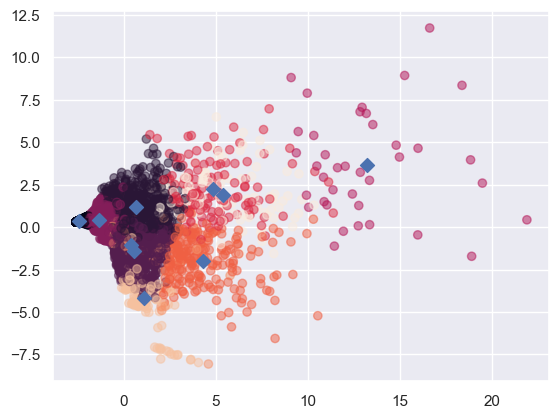

In [149]:
# scale data
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# construct components
pca = PCA(n_components=6)
embeddings = pca.fit_transform(attributes_scaled)

# perform k-mean clustering
model = KMeans(n_clusters=10)
labels = model.fit_predict(embeddings)

# for 2D plot: use best components
xs = embeddings[:,0]
ys = embeddings[:,1]

plt.scatter(xs, ys, c=labels, alpha = 0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker="D", s=50)
plt.show()

### Evaluate clustering

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.

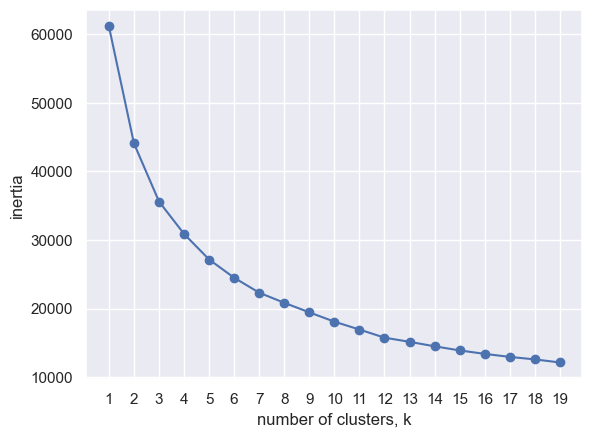

In [150]:
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(embeddings)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### Crosstable

In [151]:
positions = df['Pos'].values.tolist()

eval_df =  pd.DataFrame({'labels':labels, 'position': positions})

ct = pd.crosstab(eval_df['labels'], eval_df['position'])
ct

position,DF,"DF,FW","DF,MF",FW,"FW,DF","FW,MF",GK,MF,"MF,DF","MF,FW"
labels,,,,,,,,,,
0,212,16,21,63,3,32,286,145,14,26
1,123,7,14,95,8,92,0,108,13,80
2,290,8,40,59,3,93,1,174,16,54
3,472,24,64,73,10,113,7,297,44,98
4,0,0,0,30,0,3,0,2,0,3
5,0,0,1,74,1,31,0,9,1,14
6,10,1,7,68,3,65,0,41,2,26
7,4,1,2,22,2,13,0,16,3,9
8,48,4,7,19,4,16,0,17,3,11


In [152]:
from scipy.stats import chi2_contingency

# Assuming `crosstab` is a pandas DataFrame containing your cross table
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 2063.612571844347
P-value: 0.0
Degrees of freedom: 81


### Hieracal Clustering

In [153]:
# Calculate the linkage: mergings
"""
mergings = linkage(embeddings, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=positions,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()
"""

"\nmergings = linkage(embeddings, method='complete')\n\n# Plot the dendrogram, using varieties as labels\ndendrogram(mergings,\n           labels=positions,\n           leaf_rotation=90,\n           leaf_font_size=6,\n)\nplt.show()\n"

## Team Possession: PCA and K-Mean clustering

In [154]:
df = pd.read_csv("../data/fbref/raw/possession.csv")
df = df[df['Unnamed: 0_level_0_Player'] == 'Squad Total']


df = df.fillna(0)
df_attributes = df.drop(columns=['Unnamed: 4_level_0_90s','Season', 'League', 'Team', 'Unnamed: 0_level_0_Player', 'Unnamed: 1_level_0_Nation', 'Unnamed: 2_level_0_Pos'
                                 , 'Unnamed: 3_level_0_Age','Unnamed: 27_level_0_Matches', 'S_e',
       'L_e', 'T_e', 'U_n', 'U_n.1', 'U_n.2', 'U_n.3', 'U_n.4', 'T_o', 'T_o.1',
       'T_o.2', 'T_o.3', 'T_o.4', 'T_o.5', 'T_o.6', 'T_a', 'T_a.1', 'T_a.2',
       'T_a.3', 'T_a.4', 'C_a', 'C_a.1', 'C_a.2', 'C_a.3', 'C_a.4', 'C_a.5',
       'C_a.6', 'C_a.7', 'R_e', 'R_e.1', 'U_n.5'])


df_attributes
attributes = df_attributes.to_numpy()

/var/folders/6l/6v6rmk9141928hf9tsw7qqxw0000gn/T/ipykernel_15143/401562583.py:1: DtypeWarning: Columns (31,32,33,34,35,36,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/fbref/raw/possession.csv")


### Cluster

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


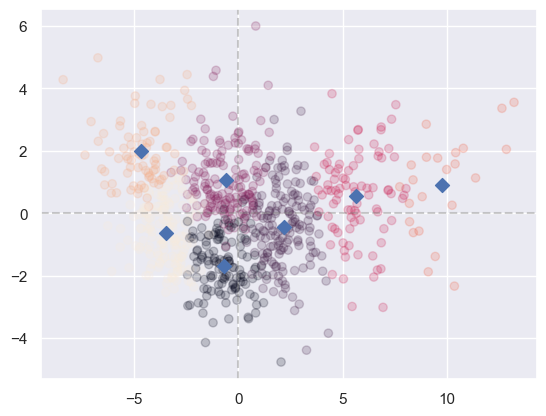

In [155]:
# scale data
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# construct components
pca = PCA(n_components=6)
components = pca.fit_transform(attributes_scaled)

# perform k-mean clustering
model = KMeans(n_clusters=7)
labels = model.fit_predict(components)


# for 2D plot: use best components
xs = components[:,0]
ys = components[:,1]

plt.scatter(xs, ys, c=labels, alpha = 0.2)
plt.axhline(ys.mean(), color='grey', linestyle='dashed', alpha = 0.4)
plt.axvline(xs.mean(), color='grey', linestyle='dashed', alpha = 0.4)

#plt.ayhline(xs.mean(), color='grey', linestyle='dashed')

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker="D", s=50)
plt.show()

### Predict player to cluster

[[-18.70059588   5.68922525  11.35803181   1.64037771  -3.06129337
    1.45667353]]


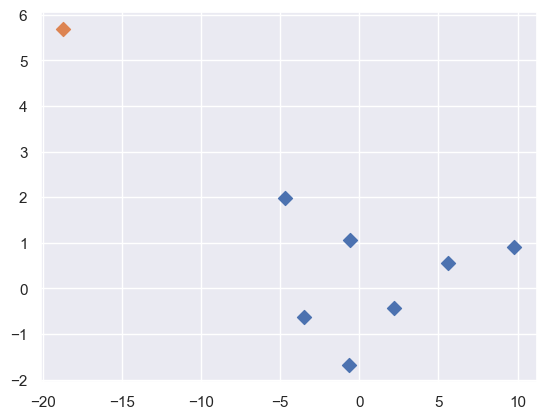

In [156]:
# Pick player
player_df = dataframes['possession']
player_df = player_df[player_df["Player"] == "David Raum"]
player_df = player_df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age','90s'])

idx = 633

attributes = player_df.to_numpy()
attributes

# scale and create components
player_scaled_attributes = scaler.transform(attributes)
player_embedding = pca.transform(player_scaled_attributes)

print(player_embedding)

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker="D", s=50)
plt.scatter(player_embedding[:,0], player_embedding[:,1], marker="D", s=50)
plt.show()


### Throw player into football team dataset

In [158]:
#query player 
query_player = 'Thomas Müller'

# get player
player_df = dataframes['possession']
player_df = player_df.dropna()
#player_df = player_df[player_df["Player"] == query_player]


# all teams
df = pd.read_csv("../data/fbref/raw/possession.csv")
df = df[df['Unnamed: 0_level_0_Player'] == 'Squad Total']
df = df[df['Season'] == '2022-2023']

rename = {
    'Unnamed: 4_level_0_90s': '90s',
    'Unnamed: 0_level_0_Player': 'Player',
    'Unnamed: 1_level_0_Nation': 'Nation',
    'Unnamed: 2_level_0_Pos': 'Pos',
    'Unnamed: 3_level_0_Age': 'Age'

}
df = df.rename(columns=rename)

df_team = df.drop(columns=['Unnamed: 27_level_0_Matches', 'S_e',
       'L_e', 'T_e', 'U_n', 'U_n.1', 'U_n.2', 'U_n.3', 'U_n.4', 'T_o', 'T_o.1',
       'T_o.2', 'T_o.3', 'T_o.4', 'T_o.5', 'T_o.6', 'T_a', 'T_a.1', 'T_a.2',
       'T_a.3', 'T_a.4', 'C_a', 'C_a.1', 'C_a.2', 'C_a.3', 'C_a.4', 'C_a.5',
       'C_a.6', 'C_a.7', 'R_e', 'R_e.1', 'U_n.5'])

features = ['Touches_Touches', 'Touches_Def Pen', 'Touches_Def 3rd',
       'Touches_Mid 3rd', 'Touches_Att 3rd', 'Touches_Att Pen', 'Touches_Live',
       'Take-Ons_Att', 'Take-Ons_Succ', 'Take-Ons_Succ%', 'Take-Ons_Tkld',
       'Take-Ons_Tkld%', 'Carries_Carries', 'Carries_TotDist',
       'Carries_PrgDist', 'Carries_PrgC', 'Carries_1/3', 'Carries_CPA',
       'Carries_Mis', 'Carries_Dis', 'Receiving_Rec', 'Receiving_PrgR']


df_team[features] = df[features].dropna()
player_df[features] = player_df[features].dropna()


# scale data
scaler = StandardScaler()
normalizer = Normalizer()

df_team[features] =  normalizer.fit_transform(df_team[features])
player_df[features] =  normalizer.fit_transform(player_df[features])

df_concat = pd.concat([player_df, df_team], ignore_index=True)

display(player_df)

/var/folders/6l/6v6rmk9141928hf9tsw7qqxw0000gn/T/ipykernel_15143/4122526977.py:11: DtypeWarning: Columns (31,32,33,34,35,36,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/fbref/raw/possession.csv")
/var/folders/6l/6v6rmk9141928hf9tsw7qqxw0000gn/T/ipykernel_15143/4122526977.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df[features] = player_df[features].dropna()
/var/folders/6l/6v6rmk9141928hf9tsw7qqxw0000gn/T/ipykernel_15143/4122526977.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Season,League,Team,Player,Nation,Pos,Age,90s,Touches_Touches,Touches_Def Pen,...,Carries_Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR
1,2022-2023,EPL,Manchester City,Rodri,ESP,MF,26.0,32.3,0.247946,0.009018,...,0.151860,0.779985,0.426025,0.005759,0.005456,0.000227,0.001591,0.001440,0.190279,0.002804
2,2022-2023,EPL,Manchester City,Erling Haaland,NOR,FW,22.0,30.8,0.295363,0.006968,...,0.156778,0.781957,0.294589,0.013549,0.003871,0.009678,0.019742,0.010065,0.225684,0.058453
3,2022-2023,EPL,Manchester City,Kevin De Bruyne,BEL,MF,31.0,26.9,0.247630,0.001731,...,0.150309,0.761663,0.454654,0.013313,0.010784,0.002130,0.005592,0.003861,0.192379,0.032618
4,2022-2023,EPL,Manchester City,İlkay Gündoğan,GER,MF,31.0,26.1,0.261258,0.004484,...,0.155077,0.789415,0.380169,0.007667,0.006365,0.001013,0.004051,0.003906,0.206142,0.017938
5,2022-2023,EPL,Manchester City,Manuel Akanji,SUI,DF,27.0,25.4,0.208682,0.011318,...,0.144422,0.789736,0.471335,0.002245,0.003741,0.000094,0.001122,0.000281,0.162194,0.001590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,2022-2023,PrimeiraLiga,Santa Clara,Walter González,PAR,FW,27.0,4.4,0.304676,0.016926,...,0.145084,0.756853,0.304676,0.012090,0.009672,0.002418,0.019344,0.012090,0.224880,0.026599
3990,2022-2023,PrimeiraLiga,Santa Clara,Pedro Bicalho,BRA,"MF,FW",21.0,2.1,0.367862,0.007664,...,0.172435,0.639927,0.141780,0.000000,0.000000,0.000000,0.019159,0.003832,0.222250,0.022991
3992,2022-2023,PrimeiraLiga,Santa Clara,Filip Stevanovic,SRB,"FW,MF",19.0,1.7,0.378904,0.005741,...,0.137783,0.620024,0.304271,0.017223,0.011482,0.005741,0.017223,0.011482,0.218157,0.034446
3993,2022-2023,PrimeiraLiga,Santa Clara,Rodrigo Valente,POR,"MF,FW",21.0,1.1,0.277304,0.022184,...,0.127560,0.737629,0.393772,0.011092,0.011092,0.005546,0.005546,0.005546,0.177475,0.005546


In [160]:
# construct components
pca = PCA(n_components=6)
embeddings = pca.fit_transform(df_concat[features])
pca_df = pd.DataFrame(embeddings, columns=[f'PCA_{i+1}' for i in range(embeddings.shape[1])])
df_concat = pd.concat([df_concat, pca_df], axis=1)

# perform k-mean clustering
df_ex = df_concat[df_concat['Player'] == "Squad Total"]
components = [ 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6']
model = KMeans(n_clusters=3)
labels = model.fit_predict(df_ex[components])

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [161]:
df_concat[df_concat['Player'] == query_player]['PCA_2'].values[0]

0.17565101098534494

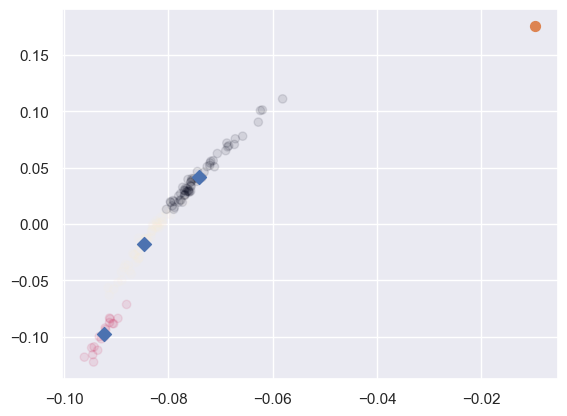

In [162]:
# for 2D plot: use best components
xs = df_ex['PCA_1'].to_numpy()
ys = df_ex['PCA_2'].to_numpy()
plt.scatter(xs, ys, c=labels, alpha = 0.1)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker="D", s=50)

# query player coordinates
x_query = df_concat[df_concat['Player'] == query_player]['PCA_1'].values[0]# df_concat[df_concat['Player'] == query_player]['PCA_1'][0]
y_query = df_concat[df_concat['Player'] == query_player]['PCA_2'].values[0]# df_concat[df_concat['Player'] == query_player]['PCA_2'][0]
plt.scatter(x_query, y_query, s=50)



plt.show()


### Evaluate clustering

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.

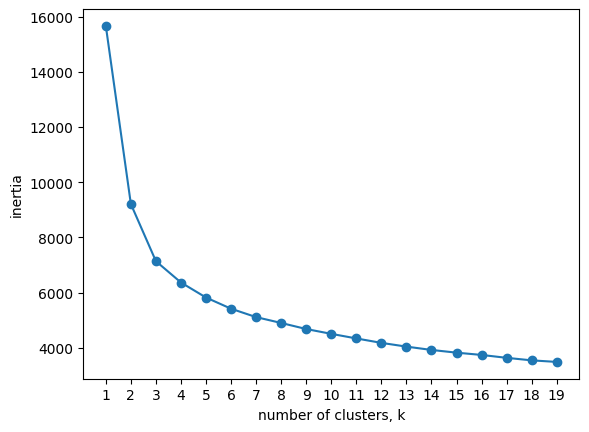

In [ ]:
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(embeddings)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.

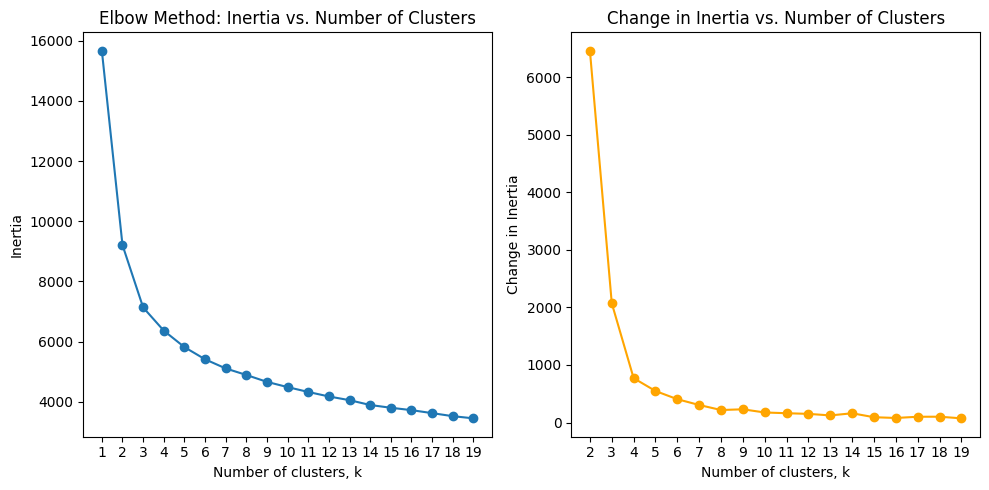

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(embeddings)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Calculate the changes in inertia
inertia_changes = [inertias[i] - inertias[i + 1] for i in range(len(inertias) - 1)]

# Plot ks vs inertias
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xticks(ks)

# Plot changes in inertia
plt.subplot(1, 2, 2)
plt.plot(ks[1:], inertia_changes, '-o', color='orange')
plt.xlabel('Number of clusters, k')
plt.ylabel('Change in Inertia')
plt.title('Change in Inertia vs. Number of Clusters')
plt.xticks(ks[1:])

plt.tight_layout()
plt.show()


## Cosine Similarity

### Player vs. Player & PCA

using all player stats
#### Standard Scaler

In [ ]:
# load, set index, and seperate into stats and player information
df = pd.read_csv('../data/fbref/player_stats.csv')
df = df.drop('Player.1',axis='columns')
df = df.set_index(df['Player'], drop=True)
l = ['Season','League','Team','Player',	'Nation',	'Pos',	'Age',	'90s']
player_info = df[l]

# keep only the features
features = [col for col in df.columns if col not in l]
df = df[features]

# handle NaN 
df = df.fillna(1)

# pipeline: scale and create principal components
scaler = StandardScaler()
pca = PCA(n_components=15)
pipeline = make_pipeline(scaler,pca)
embeddings = pipeline.fit_transform(df)

# create df embeddings and get query player
embeddings_df = pd.DataFrame(embeddings,index=df.index)
query_player = embeddings_df.loc['Christopher Nkunku']

similarities = embeddings_df.dot(query_player)
similarities.nlargest(10)

Player
Kylian Mbappé            427.812140
Xavi Simons              425.840446
Vinicius Júnior          399.825257
Khvicha Kvaratskhelia    382.278689
Randal Kolo Muani        355.373680
Lionel Messi             348.665509
Rodrygo                  343.574228
Mohamed Salah            333.947309
Harry Kane               318.051090
Rafa Silva               290.475592
dtype: float64

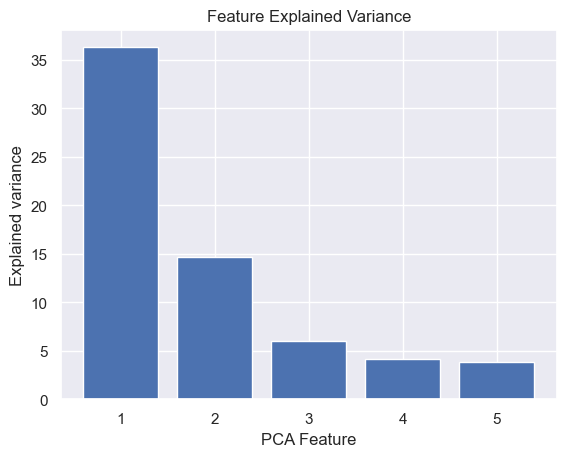

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

#### Normalizer

In [ ]:
# load, set index, and seperate into stats and player information
df = pd.read_csv('../data/fbref/player_stats.csv')
df = df.drop('Player.1',axis='columns')
df = df.set_index(df['Player'], drop=True)
l = ['Season','League','Team','Player',	'Nation',	'Pos',	'Age',	'90s']
player_info = df[l]

# keep only the features
features = [col for col in df.columns if col not in l]
df = df[features]

# handle NaN 
df = df.fillna(1)

# pipeline: scale and create principal components
scaler = Normalizer()
pca = PCA(n_components=15)
pipeline = make_pipeline(scaler,pca)
embeddings = pipeline.fit_transform(df)

# create df embeddings and get query player
embeddings_df = pd.DataFrame(embeddings,index=df.index)
query_player = embeddings_df.loc['Christopher Nkunku']

similarities = embeddings_df.dot(query_player)
similarities.nlargest(10)

Player
Rasmus Højlund        0.097667
Folarin Balogun       0.096603
Thijs Dallinga        0.096316
Elye Wahi             0.096278
Mama Samba Baldé      0.095887
Dany Mota             0.095516
Arnaud Kalimuendo     0.095332
Luiz Henrique         0.095297
Brian Brobbey         0.095230
Mounaim El Idrissy    0.094972
dtype: float64

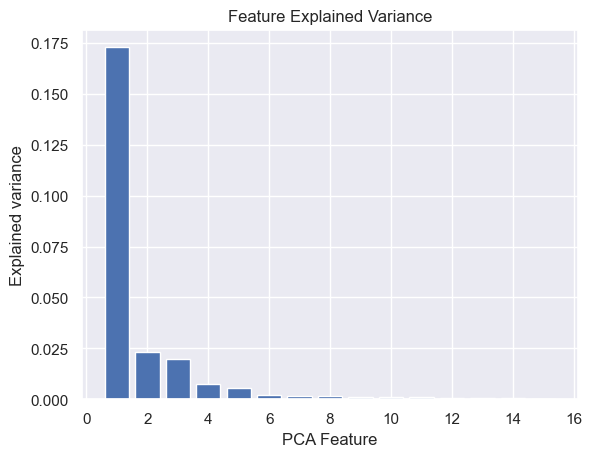

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

#### Min Max Scaler

In [ ]:
# load, set index, and seperate into stats and player information
df = pd.read_csv('../data/fbref/player_stats.csv')
df = df.drop('Player.1',axis='columns')
df = df.set_index(df['Player'], drop=True)
l = ['Season','League','Team','Player',	'Nation',	'Pos',	'Age',	'90s']
player_info = df[l]

# keep only the features
features = [col for col in df.columns if col not in l]
df = df[features]

# handle NaN 
df = df.fillna(1)

# pipeline: scale and create principal components
scaler = MinMaxScaler()
pca = PCA(n_components=15)
pipeline = make_pipeline(scaler,pca)
embeddings = pipeline.fit_transform(df)

# create df embeddings and get query player
embeddings_df = pd.DataFrame(embeddings,index=df.index)
query_player = embeddings_df.loc['Christopher Nkunku']

similarities = embeddings_df.dot(query_player)
similarities.nlargest(10)

Player
Kylian Mbappé            5.216865
Vinicius Júnior          4.949611
Xavi Simons              4.554544
Lionel Messi             4.436675
Mohamed Salah            4.204578
Randal Kolo Muani        3.994809
Harry Kane               3.847571
Khvicha Kvaratskhelia    3.828395
Bukayo Saka              3.751761
Rodrygo                  3.751758
dtype: float64

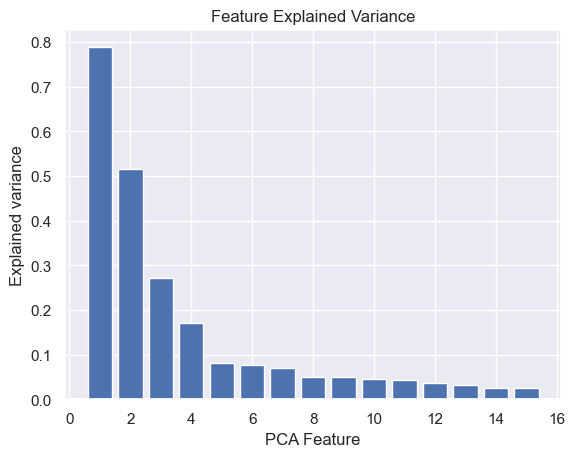

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

### Player vs. Team

In [ ]:
player_df = dataframes['possession']
player_df.set_index(player_df['Player'])

,Season,League,Team,Player,Nation,Pos,Age,90s,Touches_Touches,Touches_Def Pen,...,Carries_Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR
Player,,,,,,,,,,,,,,,,,,,,,
Ederson,2022-2023,EPL,Manchester City,Ederson,BRA,GK,28.0,35.0,1302.0,1049.0,...,869.0,4059.0,2429.0,0.0,0.0,0.0,0.0,0.0,833.0,0.0
Rodri,2022-2023,EPL,Manchester City,Rodri,ESP,MF,26.0,32.3,3272.0,119.0,...,2004.0,10293.0,5622.0,76.0,72.0,3.0,21.0,19.0,2511.0,37.0
Erling Haaland,2022-2023,EPL,Manchester City,Erling Haaland,NOR,FW,22.0,30.8,763.0,18.0,...,405.0,2020.0,761.0,35.0,10.0,25.0,51.0,26.0,583.0,151.0
Kevin De Bruyne,2022-2023,EPL,Manchester City,Kevin De Bruyne,BEL,MF,31.0,26.9,1860.0,13.0,...,1129.0,5721.0,3415.0,100.0,81.0,16.0,42.0,29.0,1445.0,245.0
İlkay Gündoğan,2022-2023,EPL,Manchester City,İlkay Gündoğan,GER,MF,31.0,26.1,1806.0,31.0,...,1072.0,5457.0,2628.0,53.0,44.0,7.0,28.0,27.0,1425.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Joao Marcos,2022-2023,PrimeiraLiga,Santa Clara,Joao Marcos,BRA,"FW,MF",22.0,1.8,28.0,0.0,...,18.0,77.0,22.0,0.0,1.0,0.0,5.0,4.0,23.0,6.0
Filip Stevanovic,2022-2023,PrimeiraLiga,Santa Clara,Filip Stevanovic,SRB,"FW,MF",19.0,1.7,66.0,1.0,...,24.0,108.0,53.0,3.0,2.0,1.0,3.0,2.0,38.0,6.0
Rodrigo Valente,2022-2023,PrimeiraLiga,Santa Clara,Rodrigo Valente,POR,"MF,FW",21.0,1.1,50.0,4.0,...,23.0,133.0,71.0,2.0,2.0,1.0,1.0,1.0,32.0,1.0


In [ ]:
#query player 
query_player = 'Xavi Simons'

# get player
player_df = dataframes['possession']
player_df = player_df.dropna()
#player_df = player_df[player_df["Player"] == query_player]


# all teams
df = pd.read_csv("../data/fbref/possession.csv")
df = df[df['Unnamed: 0_level_0_Player'] == 'Squad Total']
df = df[df['Season'] == '2022-2023']

rename = {
    'Unnamed: 4_level_0_90s': '90s',
    'Unnamed: 0_level_0_Player': 'Player',
    'Unnamed: 1_level_0_Nation': 'Nation',
    'Unnamed: 2_level_0_Pos': 'Pos',
    'Unnamed: 3_level_0_Age': 'Age'

}
df = df.rename(columns=rename)

df_team = df.drop(columns=['Unnamed: 27_level_0_Matches', 'S_e',
       'L_e', 'T_e', 'U_n', 'U_n.1', 'U_n.2', 'U_n.3', 'U_n.4', 'T_o', 'T_o.1',
       'T_o.2', 'T_o.3', 'T_o.4', 'T_o.5', 'T_o.6', 'T_a', 'T_a.1', 'T_a.2',
       'T_a.3', 'T_a.4', 'C_a', 'C_a.1', 'C_a.2', 'C_a.3', 'C_a.4', 'C_a.5',
       'C_a.6', 'C_a.7', 'R_e', 'R_e.1', 'U_n.5'])

features = ['Touches_Touches', 'Touches_Def Pen', 'Touches_Def 3rd',
       'Touches_Mid 3rd', 'Touches_Att 3rd', 'Touches_Att Pen', 'Touches_Live',
       'Take-Ons_Att', 'Take-Ons_Succ', 'Take-Ons_Succ%', 'Take-Ons_Tkld',
       'Take-Ons_Tkld%', 'Carries_Carries', 'Carries_TotDist',
       'Carries_PrgDist', 'Carries_PrgC', 'Carries_1/3', 'Carries_CPA',
       'Carries_Mis', 'Carries_Dis', 'Receiving_Rec', 'Receiving_PrgR']
df_team = df_team.set_index(df_team['Team'])


player_df[features] = player_df[features].dropna()



# scale data
scaler = StandardScaler()
normalizer = Normalizer()

df_team[features] =  scaler.fit_transform(df_team[features])
player_df[features] =  scaler.fit_transform(player_df[features])


/var/folders/6l/6v6rmk9141928hf9tsw7qqxw0000gn/T/ipykernel_13262/720152874.py:11: DtypeWarning: Columns (31,32,33,34,35,36,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/fbref/possession.csv")
/var/folders/6l/6v6rmk9141928hf9tsw7qqxw0000gn/T/ipykernel_13262/720152874.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df[features] = player_df[features].dropna()
/var/folders/6l/6v6rmk9141928hf9tsw7qqxw0000gn/T/ipykernel_13262/720152874.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
similiraties = df_team[features].dot(player_df[features].iloc[2919])
similiraties.nlargest(10)

Team
Paris S-G          39.682129
Manchester City    34.330064
Real Madrid        33.443800
Barcelona          32.391244
Napoli             30.199490
Lyon               26.626977
Ajax               24.589771
Lille              24.464887
Liverpool          23.348141
Chelsea            22.231909
dtype: float64